In [1]:
# Add the Pandas dependency.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import rc


In [2]:
#Load the CSV
cardio_df = pd.read_csv("../Resources/cardio_train.csv", index_col= "id")
cardio_df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
99996,19066,2,183,105.0,180,90,3,1,0,1,0,1


## Data Cleaning and Formatting

In [3]:
#Determine if there are any missing values
cardio_df.count()

age            70000
gender         70000
height         70000
weight         70000
ap_hi          70000
ap_lo          70000
cholesterol    70000
glc            70000
smoke          70000
alco           70000
active         70000
cardio         70000
dtype: int64

In [4]:
#Determine the data types for the cardio DF
cardio_df.dtypes

age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
glc              int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [5]:
#Change age column from days to years
cardio_df['age'] = cardio_df['age'] / 365.25
cardio_df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,50.357290,2,168,62.0,110,80,1,1,0,0,1,0
1,55.381246,1,156,85.0,140,90,3,1,0,0,1,1
2,51.627652,1,165,64.0,130,70,3,1,0,0,0,1
3,48.249144,2,169,82.0,150,100,1,1,0,0,1,1
4,47.841205,1,156,56.0,100,60,1,1,0,0,0,0


In [6]:
#Format age column
cardio_df['age'] = cardio_df['age'].map("{:,.0f}".format)
cardio_df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,48,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,53,2,168,76.0,120,80,1,1,1,0,1,0
99995,62,1,158,126.0,140,90,2,2,0,0,1,1
99996,52,2,183,105.0,180,90,3,1,0,1,0,1


In [7]:
#Change age datatype to int
cardio_df['age'] = cardio_df['age'].astype(int)
cardio_df.dtypes

age              int32
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
glc              int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [8]:
#Look at statistical value for columns with outliers
cardio_df[['age', 'height', 'weight', 'ap_hi', 'ap_lo']].describe()

,age,height,weight,ap_hi,ap_lo
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.303157,164.359229,74.205690,128.817286,96.630414
std,6.760171,8.210126,14.395757,154.011419,188.472530
min,30.000000,55.000000,10.000000,-150.000000,-70.000000
25%,48.000000,159.000000,65.000000,120.000000,80.000000
50%,54.000000,165.000000,72.000000,120.000000,80.000000
75%,58.000000,170.000000,82.000000,140.000000,90.000000
max,65.000000,250.000000,200.000000,16020.000000,11000.000000


In [9]:
#Take the absolute values of the ap_hi data column
cardio_df['ap_hi'] = cardio_df['ap_hi'].apply(abs)

In [10]:
#look at statistical data after applying absolute value
cardio_df[['age', 'height', 'weight', 'ap_hi', 'ap_lo']].describe()

,age,height,weight,ap_hi,ap_lo
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.303157,164.359229,74.205690,128.841429,96.630414
std,6.760171,8.210126,14.395757,153.991223,188.472530
min,30.000000,55.000000,10.000000,1.000000,-70.000000
25%,48.000000,159.000000,65.000000,120.000000,80.000000
50%,54.000000,165.000000,72.000000,120.000000,80.000000
75%,58.000000,170.000000,82.000000,140.000000,90.000000
max,65.000000,250.000000,200.000000,16020.000000,11000.000000


In [11]:
#Take the absolute value of the ap_lo column
cardio_df['ap_lo'] = cardio_df['ap_lo'].apply(abs)

In [12]:
#look at statistical data after applying absolute value
cardio_df[['age', 'height', 'weight', 'ap_hi', 'ap_lo']].describe()

,age,height,weight,ap_hi,ap_lo
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.303157,164.359229,74.205690,128.841429,96.632414
std,6.760171,8.210126,14.395757,153.991223,188.471505
min,30.000000,55.000000,10.000000,1.000000,0.000000
25%,48.000000,159.000000,65.000000,120.000000,80.000000
50%,54.000000,165.000000,72.000000,120.000000,80.000000
75%,58.000000,170.000000,82.000000,140.000000,90.000000
max,65.000000,250.000000,200.000000,16020.000000,11000.000000


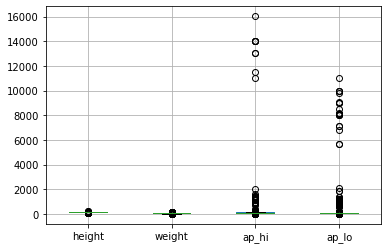

In [13]:
boxplot = cardio_df.boxplot(column=['height','weight','ap_hi','ap_lo'])

In [14]:
#Remove outliers for height column; Parameters are set at 4’10” to 7’ (147 cm to 213 cm)
index = cardio_df[(cardio_df['height'] >= 213)|(cardio_df['height'] <= 147)].index
cardio_df.drop(index, inplace=True)
cardio_df['height'].describe()

count    69103.000000
mean       164.673632
std          7.586841
min        148.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        207.000000
Name: height, dtype: float64

In [15]:
#Remove outliers for weight column; Parameters are set at 90 to 300lbs (40 kg to 136 kg)
index = cardio_df[(cardio_df['weight'] >= 136)|(cardio_df['weight'] <= 40)].index
cardio_df.drop(index, inplace=True)
cardio_df['weight'].describe()

count    68913.000000
mean        74.211332
std         13.869744
min         41.000000
25%         65.000000
50%         72.000000
75%         82.000000
max        135.000000
Name: weight, dtype: float64

In [16]:
#Remove outliers for ap_hi column; Parameters are set at 100 to 200
index = cardio_df[(cardio_df['ap_hi'] >= 250)|(cardio_df['ap_hi'] <= 50)].index
cardio_df.drop(index, inplace=True)
cardio_df['ap_hi'].describe()

count    68695.000000
mean       126.963200
std         17.025184
min         60.000000
25%        120.000000
50%        120.000000
75%        140.000000
max        240.000000
Name: ap_hi, dtype: float64

In [18]:
#Remove outliers for ap_lo column; Parameters are set at 70 to 120
index = cardio_df[(cardio_df['ap_lo'] >= 200)|(cardio_df['ap_lo'] <= 30)].index
cardio_df.drop(index, inplace=True)
cardio_df['ap_lo'].describe()

count    67722.000000
mean        81.377027
std          9.646248
min         40.000000
25%         80.000000
50%         80.000000
75%         90.000000
max        190.000000
Name: ap_lo, dtype: float64

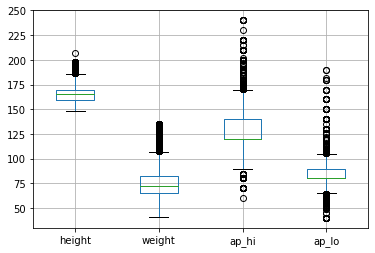

In [19]:
boxplot = cardio_df.boxplot(column=['height','weight','ap_hi','ap_lo'])

In [22]:
#Check how many datapoints there are now after removing outliers
cardio_df.count()

age            67722
gender         67722
height         67722
weight         67722
ap_hi          67722
ap_lo          67722
cholesterol    67722
glc            67722
smoke          67722
alco           67722
active         67722
cardio         67722
dtype: int64

In [23]:
cardio_df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,48,1,156,56.0,100,60,1,1,0,0,0,0


In [24]:
#Calculate BMI column
cardio_df['bmi'] = cardio_df['weight'] / (cardio_df['height']/100).pow(2)
cardio_df


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glc,smoke,alco,active,cardio,bmi
id,,,,,,,,,,,,,
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,52,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,48,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,53,2,168,76.0,120,80,1,1,1,0,1,0,26.927438
99995,62,1,158,126.0,140,90,2,2,0,0,1,1,50.472681
99996,52,2,183,105.0,180,90,3,1,0,1,0,1,31.353579


In [25]:
#Update formatting for weight and bmi columns
cardio_df['weight'] = cardio_df['weight'].map("{:,.0f}".format)
cardio_df['bmi'] = cardio_df['bmi'].map("{:,.0f}".format)
cardio_df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glc,smoke,alco,active,cardio,bmi
id,,,,,,,,,,,,,
0,50,2,168,62,110,80,1,1,0,0,1,0,22
1,55,1,156,85,140,90,3,1,0,0,1,1,35
2,52,1,165,64,130,70,3,1,0,0,0,1,24
3,48,2,169,82,150,100,1,1,0,0,1,1,29
4,48,1,156,56,100,60,1,1,0,0,0,0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,53,2,168,76,120,80,1,1,1,0,1,0,27
99995,62,1,158,126,140,90,2,2,0,0,1,1,50
99996,52,2,183,105,180,90,3,1,0,1,0,1,31


In [27]:
#Split data set into Medical Attributes

cardio_df_medical = pd.DataFrame(cardio_df, columns = ['age','gender','height','weight','ap_hi','ap_lo','cholesterol','glc','bmi'])
cardio_df_medical


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glc,bmi
id,,,,,,,,,
0,50,2,168,62,110,80,1,1,22
1,55,1,156,85,140,90,3,1,35
2,52,1,165,64,130,70,3,1,24
3,48,2,169,82,150,100,1,1,29
4,48,1,156,56,100,60,1,1,23
...,...,...,...,...,...,...,...,...,...
99993,53,2,168,76,120,80,1,1,27
99995,62,1,158,126,140,90,2,2,50
99996,52,2,183,105,180,90,3,1,31


In [28]:
#Split data set into Behavior Attributes

cardio_df_behavior = pd.DataFrame(cardio_df, columns = ['smoke','alco','active','cardio'])
cardio_df_behavior


,smoke,alco,active,cardio
id,,,,
0,0,0,1,0
1,0,0,1,1
2,0,0,0,1
3,0,0,1,1
4,0,0,0,0
...,...,...,...,...
99993,1,0,1,0
99995,0,0,1,1
99996,0,1,0,1


In [29]:
#Export Medical DataFrame to CSV
#cardio_df_medical.to_csv(r'C:\Users\Sara\Desktop\Group2_Cardiovascular_Project\Resources\cardio_df_medical.csv', index=True, header = True)


In [30]:
#Export Behavior DataFrame to CSV
#cardio_df_behavior.to_csv(r'C:\Users\Sara\Desktop\Group2_Cardiovascular_Project\Resources\cardio_df_behavior.csv', index=True, header = True)

In [31]:
cardio_df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glc,smoke,alco,active,cardio,bmi
id,,,,,,,,,,,,,
0,50,2,168,62,110,80,1,1,0,0,1,0,22
1,55,1,156,85,140,90,3,1,0,0,1,1,35
2,52,1,165,64,130,70,3,1,0,0,0,1,24
3,48,2,169,82,150,100,1,1,0,0,1,1,29
4,48,1,156,56,100,60,1,1,0,0,0,0,23


In [32]:
cardio_df = cardio_df.astype('int64')
cardio_df.dtypes

age            int64
gender         int64
height         int64
weight         int64
ap_hi          int64
ap_lo          int64
cholesterol    int64
glc            int64
smoke          int64
alco           int64
active         int64
cardio         int64
bmi            int64
dtype: object

In [33]:
#bin bmi data by medical ranges
bmi_underweight = cardio_df[(cardio_df["bmi"]<18.5)].count()["bmi"]
bmi_normal = cardio_df[(cardio_df["bmi"]>18.5) & (cardio_df["bmi"]<24.9)].count()["bmi"]
bmi_overweight = cardio_df[(cardio_df["bmi"]>24.9) & (cardio_df["bmi"]<29.9)].count()["bmi"]
bmi_obese = cardio_df[(cardio_df["bmi"]>29.9)].count()["bmi"]
print(bmi_underweight, bmi_normal, bmi_overweight, bmi_obese)

570 21559 26680 18913


Text(0, 0.5, 'Number of Records')

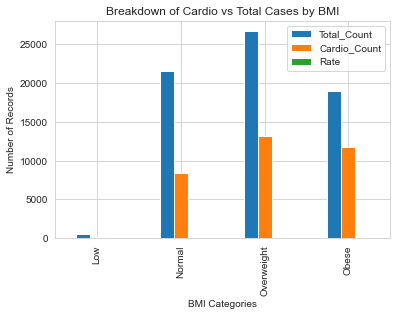

In [44]:
#Get bmi categories with cardio_yes
#We then combine the previous two graphs to be able to visualize total cases vs cardio cases in each BMI category
bmi_bars = pd.DataFrame({
    "Total_Count":[570, 21559, 26680, 18913],
    "Cardio_Count":[153, 8398, 13192, 11725],
    "Rate":[.27, .39, .49, .62]
    }, 
    index=["Low", "Normal", "Overweight", "Obese"]
)
bmi_bars.plot(kind="bar")
plt.title("Breakdown of Cardio vs Total Cases by BMI")
plt.xlabel("BMI Categories")
plt.ylabel("Number of Records")

[Text(0, 25.0, '25.00%'),
 Text(0, 30.0, '30.00%'),
 Text(0, 35.0, '35.00%'),
 Text(0, 40.0, '40.00%'),
 Text(0, 45.0, '45.00%'),
 Text(0, 50.0, '50.00%'),
 Text(0, 55.0, '55.00%'),
 Text(0, 60.0, '60.00%'),
 Text(0, 65.0, '65.00%'),
 Text(0, 70.0, '70.00%')]

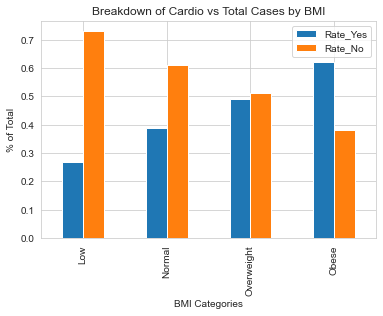

In [49]:
#Get bmi categories with cardio_yes
#We then combine the previous two graphs to be able to visualize total cases vs cardio cases in each BMI category
bmi_bars = pd.DataFrame({
    "Rate_Yes":[.27, .39, .49, .62],
    "Rate_No":[.73, .61, .51, .38]
    }, 
    index=["Low", "Normal", "Overweight", "Obese"]
)
bmi_bars.plot(kind="bar")
plt.title("Breakdown of Cardio vs Total Cases by BMI")
plt.xlabel("BMI Categories")
plt.ylabel("% of Total")
y_value=['{:,.2f}'.format(x) + '%' for x in ax.get_yticks()]
ax.set_yticklabels(y_value)

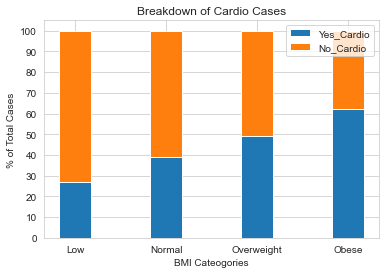

In [105]:
import numpy as np
import matplotlib.pyplot as plt

N = 4
YesPercent = (27, 39, 49, 62)
NoPercent = (73, 61, 51, 38)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, YesPercent, width)
p2 = plt.bar(ind, NoPercent, width,
             bottom=YesPercent)

plt.ylabel('% of Total Cases')
plt.xlabel('BMI Cateogories')
plt.title('Breakdown of Cardio Cases')
plt.xticks(ind, ('Low', 'Normal', 'Overweight', 'Obese'))
plt.yticks(np.arange(0, 110, 10))
plt.legend((p1[0], p2[0]), ('Yes_Cardio', 'No_Cardio'))
#Save the figure
plt.savefig("../Resources/BMI_Breakdown.png")
plt.show()

In [63]:
cardio_df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glc,smoke,alco,active,cardio,bmi
id,,,,,,,,,,,,,
0,50,2,168,62,110,80,1,1,0,0,1,0,22
1,55,1,156,85,140,90,3,1,0,0,1,1,35
2,52,1,165,64,130,70,3,1,0,0,0,1,24
3,48,2,169,82,150,100,1,1,0,0,1,1,29
4,48,1,156,56,100,60,1,1,0,0,0,0,23


In [ ]:
#Creating histogram



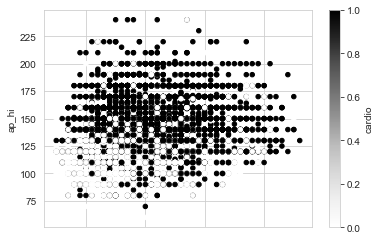

In [35]:
cardio_df.plot.scatter(x ="bmi", y="ap_hi", c="cardio")

In [36]:
#Creating a summary table for BMI records
bmiDf = pd.DataFrame(
            [{"Low": bmi_underweight,
            "Normal": bmi_normal,
            "Overweight":bmi_overweight,
             "Obese": bmi_obese}])
bmiDf

,Low,Normal,Overweight,Obese
0,570,21559,26680,18913


Text(0, 0.5, 'Number of Records')

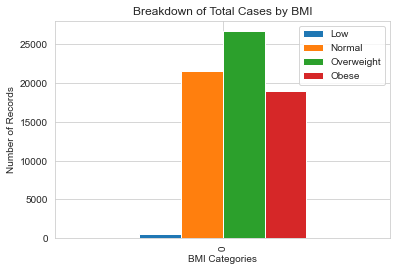

In [37]:
#First graph
bmiDf.plot(kind='bar')
plt.title("Breakdown of Total Cases by BMI")
plt.xlabel("BMI Categories")
plt.ylabel("Number of Records")


In [38]:
#Create DataFrames for Cardio=1 and Cardio=0
cardio_yes_df = cardio_df[cardio_df["cardio"] == 1]
cardio_no_df = cardio_df[cardio_df["cardio"] == 0]
cardio_yes_df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glc,smoke,alco,active,cardio,bmi
id,,,,,,,,,,,,,
1,55,1,156,85,140,90,3,1,0,0,1,1,35
2,52,1,165,64,130,70,3,1,0,0,0,1,24
3,48,2,169,82,150,100,1,1,0,0,1,1,29
12,62,2,178,95,130,90,3,3,0,0,1,1,30
24,46,2,172,112,120,80,1,1,0,0,0,1,38


In [39]:
cardio_no_df = cardio_df[cardio_df["cardio"] == 0]
cardio_no_df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glc,smoke,alco,active,cardio,bmi
id,,,,,,,,,,,,,
0,50,2,168,62,110,80,1,1,0,0,1,0,22
4,48,1,156,56,100,60,1,1,0,0,0,0,23
8,60,1,151,67,120,80,2,2,0,0,0,0,29
9,61,1,157,93,130,80,3,1,0,0,1,0,38
13,48,1,158,71,110,70,1,1,0,0,1,0,28


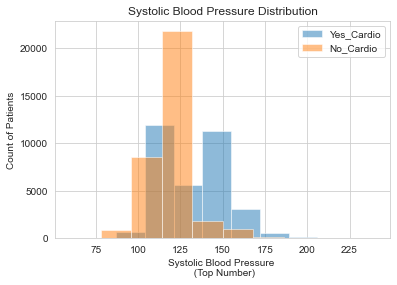

In [107]:
#histogram for Systolic pressure
series1 = cardio_yes_df['ap_hi']
series2 = cardio_no_df['ap_hi']
plt.hist(series1, label = 'Yes_Cardio', alpha=0.5)
plt.hist(series2, label='No_Cardio', alpha=0.5)
plt.legend(loc='best')
plt.title('Systolic Blood Pressure Distribution')
plt.ylabel('Count of Patients')
plt.xlabel('Systolic Blood Pressure \n (Top Number)')
plt.savefig("../Resources/Systolic_Blood_Pressure_Breakdown.png")
plt.show()

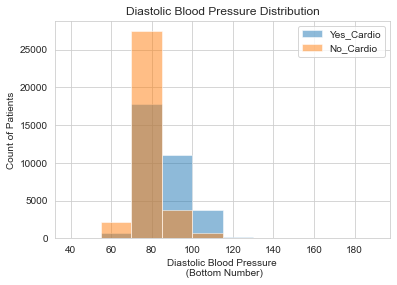

In [108]:
#histogram for Diastolic pressure
series1 = cardio_yes_df['ap_lo']
series2 = cardio_no_df['ap_lo']
plt.hist(series1, label = 'Yes_Cardio', alpha=0.5)
plt.hist(series2, label='No_Cardio', alpha=0.5)
plt.legend(loc='best')
plt.title('Diastolic Blood Pressure Distribution')
plt.ylabel('Count of Patients')
plt.xlabel('Diastolic Blood Pressure \n (Bottom Number)')
plt.savefig("../Resources/Diastolic_Blood_Pressure_Breakdown.png")
plt.show()

In [121]:
#Get cholesterol groups for xaxis
cardio_yes_chol_1 = list(cardio_yes_df.loc[cardio_yes_df["cholesterol"] ==1]['bmi'])
cardio_yes_chol_2 = list(cardio_yes_df.loc[cardio_yes_df["cholesterol"] ==2]['bmi'])
cardio_yes_chol_3 = list(cardio_yes_df.loc[cardio_yes_df["cholesterol"] ==3]['bmi'])
type(cardio_yes_chol_1)

list

In [122]:
#Get cholesterol groups for xaxis
cardio_no_chol_1 = list(cardio_no_df.loc[cardio_no_df["cholesterol"] ==1]['bmi'])
cardio_no_chol_2 = list(cardio_no_df.loc[cardio_no_df["cholesterol"] ==2]['bmi'])
cardio_no_chol_3 = list(cardio_no_df.loc[cardio_no_df["cholesterol"] ==3]['bmi'])


print(cardio_no_chol_1)
type(cardio_no_chol_1)

[22, 23, 28, 25, 28, 20, 22, 31, 29, 26, 21, 29, 21, 31, 28, 18, 24, 31, 24, 26, 24, 21, 31, 26, 25, 24, 24, 29, 27, 26, 23, 33, 29, 24, 24, 19, 27, 23, 29, 32, 28, 21, 24, 21, 27, 28, 31, 30, 26, 25, 26, 24, 23, 22, 21, 24, 25, 21, 22, 25, 35, 26, 27, 24, 29, 24, 23, 23, 26, 24, 21, 21, 19, 25, 23, 24, 19, 27, 35, 24, 25, 23, 23, 25, 27, 21, 27, 33, 27, 25, 23, 27, 28, 26, 28, 24, 25, 25, 21, 31, 23, 24, 37, 21, 30, 25, 24, 30, 26, 22, 26, 26, 20, 23, 33, 38, 24, 29, 29, 24, 20, 22, 29, 27, 21, 33, 23, 33, 30, 38, 24, 26, 28, 29, 28, 32, 25, 28, 26, 29, 26, 25, 30, 33, 29, 31, 27, 27, 26, 25, 21, 40, 34, 30, 31, 28, 28, 19, 33, 23, 34, 27, 21, 21, 25, 17, 26, 20, 22, 28, 27, 25, 25, 23, 29, 32, 26, 36, 19, 28, 20, 25, 26, 28, 27, 29, 28, 31, 28, 39, 23, 23, 25, 24, 18, 28, 27, 22, 23, 22, 30, 25, 24, 25, 25, 32, 20, 26, 26, 30, 21, 34, 31, 23, 22, 27, 28, 22, 27, 32, 22, 24, 26, 23, 22, 22, 24, 26, 26, 46, 30, 24, 34, 29, 26, 26, 25, 29, 19, 25, 22, 21, 23, 26, 25, 17, 33, 45, 29, 24,

list

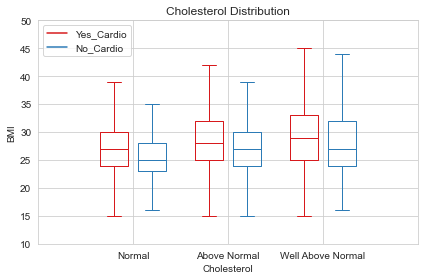

In [134]:
data_a = [cardio_yes_chol_1, cardio_yes_chol_2, cardio_yes_chol_3]
data_b = [cardio_no_chol_1, cardio_no_chol_2, cardio_no_chol_3]

ticks = ['Normal', 'Above Normal', 'Well Above Normal']

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

plt.figure()

bpl = plt.boxplot(data_a, positions=np.array(range(len(data_a)))*2.0-0.4, sym='', widths=0.6)
bpr = plt.boxplot(data_b, positions=np.array(range(len(data_b)))*2.0+0.4, sym='', widths=0.6)
set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label='Yes_Cardio')
plt.plot([], c='#2C7BB6', label='No_Cardio')
plt.legend(loc='best')
plt.title('Cholesterol Distribution')
plt.ylabel('BMI')
plt.xlabel('Cholesterol')

plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-2, len(ticks)*2)
plt.ylim(10, 50)
plt.tight_layout()
plt.savefig("../Resources/Cholesterol_Distribution.png")


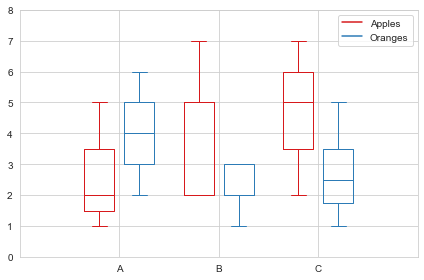

In [94]:

data_a = [[1,2,5], [5,7,2,2,5], [7,2,5]]
data_b = [[6,4,2], [1,2,5,3,2], [2,3,5,1]]

ticks = ['A', 'B', 'C']

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

plt.figure()

bpl = plt.boxplot(data_a, positions=np.array(range(len(data_a)))*2.0-0.4, sym='', widths=0.6)
bpr = plt.boxplot(data_b, positions=np.array(range(len(data_b)))*2.0+0.4, sym='', widths=0.6)
set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label='Apples')
plt.plot([], c='#2C7BB6', label='Oranges')
plt.legend()

plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-2, len(ticks)*2)
plt.ylim(0, 8)
plt.tight_layout()

In [42]:
#avg BMI for each cholesterol group
cardio_yes_avg_bmi_1 = cardio_yes_df.loc[cardio_yes_df["cholesterol"] ==1].mean()["bmi"]
cardio_yes_avg_bmi_2 = cardio_yes_df.loc[cardio_yes_df["cholesterol"] ==2].mean()["bmi"]
cardio_yes_avg_bmi_3 = cardio_yes_df.loc[cardio_yes_df["cholesterol"] ==3].mean()["bmi"]

cardio_no_avg_bmi_1 = cardio_no_df.loc[cardio_no_df["cholesterol"] ==1].mean()["bmi"]
cardio_no_avg_bmi_2 = cardio_no_df.loc[cardio_no_df["cholesterol"] ==2].mean()["bmi"]
cardio_no_avg_bmi_3 = cardio_no_df.loc[cardio_no_df["cholesterol"] ==3].mean()["bmi"]


print(cardio_yes_avg_bmi_1)
print(cardio_yes_avg_bmi_2)
print(cardio_yes_avg_bmi_3)
print(cardio_no_avg_bmi_1)
print(cardio_no_avg_bmi_2)
print(cardio_no_avg_bmi_3)

27.795857452966715
29.080388207288042
29.715691263782865
26.149916422900127
27.446216216216218
28.325353645266595
